**Import Libraries**

In [1]:
!pip uninstall scikit-learn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
import string
import seaborn as sns
import numpy as np
import missingno
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
import matplotlib as mpl
from wordcloud import WordCloud
from nltk.probability import FreqDist
from matplotlib.font_manager import FontProperties
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from tabulate import tabulate


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


**Load Data**

In [2]:
df = pd.read_csv('../../../../OneDrive/Documents/rawdata.csv')
# Rename the 'topic' column to 'title'
df.rename(columns={'topic': 'title'}, inplace=True)
df['oranginal_title'] = df['title'].copy()
df.head()

news_id                                              title  \
0   O65050609  อากาศร้อนจัดในอินเดียคร่าชีวิตผู้คนไปแล้วอย่าง...   
1   D63111222    โควิด-19 ผลักคนญี่ปุ่นฆ่าตัวตายมากสุดในรอบ 5 ปี   
2         NaN  อุทาหรณ์ หนุ่มก่อสร้างกินขนมเข่งชิ้นใหญ่แล้วติ...   
3  TR64042602  ติดโควิด ให้กินพารา วิต่ามินซี โซดามิ้ืนท์ ฟ้า...   
4  TR63112704  หลักการดื่มน้ำเพื่อรักษาโรคเหน็บชา หายในเดือนท...   

                                             details                  source  \
0         อันตรายจากอากาศร้อนทำให้ถึงตายได้ จริงหรือ              springnews   
1  โควิด-19 ส่งผลกระทบต่อประชาชน จนทำให้เกิดการทำ...                    PPTV   
2  จังหวัดระยอง โดยเพื่อนของชายอายุ 25 ปี คนงานก่...        เช้านี้ที่หมอชิต   
3  พารา วิต่ามินซี โซดามิ้ืนท์ ฟ้าทะลายโจรฯ NAC ร...            Drama-addict   
4  หลักการดื่มน้ำเพื่อรักษาโรคเหน็บชา หายในเดือนท...  วิถีธรรมชาติ ออร์แกนิค   

                                                 url  viewer publish_date  \
0           https://www.springnews.co.th/news/824035     3.0     4/5/2565   
1  https://www.pptvhd36.com/news/%E0%B8%95%E0%B9%...   250.0   12/11/2563   
2                 https://news.ch7.com/detail/391122  1300.0   29/01/2563   
3  https://web.facebook.com/DramaAdd/photos/a.411...  3200.0   25/04/2564   
4  https://web.facebook.com/witeethammachad/posts...   345.0   21/11/2563   

   check_date                       note  environment_score  ...  \
0    6/5/2565                        NaN                  4  ...   
1  13/11/2563                        NaN                  3  ...   
2  30/01/2563                        NaN                  2  ...   
3  26/04/2564                        NaN                  4  ...   
4  26/11/2563  มาจากศูนย์ต่อต้านข่าวปลอม                  3  ...   

   communication  media_link  communication_channels         status  \
0            NaN         NaN                     NaN  รอรับทราบข่าว   
1            NaN         NaN                     NaN  รอรับทราบข่าว   
2            NaN         NaN                     NaN  รอรับทราบข่าว   
3            NaN         NaN                     NaN  รอรับทราบข่าว   
4            NaN         NaN                     NaN  รอรับทราบข่าว   

   reply_time                                create_by create_date reply_date  \
0         NaN  กรมอนามัย (rrhl.moph@anamai.mail.go.th)    6/5/2565        NaN   
1         NaN  กรมอนามัย (rrhl.moph@anamai.mail.go.th)  12/11/2563        NaN   
2         NaN                                      NaN  30/01/2563        NaN   
3         NaN  กรมอนามัย (rrhl.moph@anamai.mail.go.th)  26/04/2564        NaN   
4         NaN  กรมอนามัย (rrhl.moph@anamai.mail.go.th)  27/11/2563        NaN   

         Created at                                    oranginal_title  
0     5/6/2022 3:37  อากาศร้อนจัดในอินเดียคร่าชีวิตผู้คนไปแล้วอย่าง...  
1  11/12/2020 15:35    โควิด-19 ผลักคนญี่ปุ่นฆ่าตัวตายมากสุดในรอบ 5 ปี  
2   1/30/2020 12:00  อุทาหรณ์ หนุ่มก่อสร้างกินขนมเข่งชิ้นใหญ่แล้วติ...  
3    4/26/2021 3:37  ติดโควิด ให้กินพารา วิต่ามินซี โซดามิ้ืนท์ ฟ้า...  
4   11/27/2020 5:37  หลักการดื่มน้ำเพื่อรักษาโรคเหน็บชา หายในเดือนท...  

[5 rows x 40 columns]

In [3]:
df.shape

(7776, 40)

**Pre Procressing**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   news_id                 6090 non-null   object 
 1   title                   7776 non-null   object 
 2   details                 7769 non-null   object 
 3   source                  7776 non-null   object 
 4   url                     7749 non-null   object 
 5   viewer                  5518 non-null   float64
 6   publish_date            7771 non-null   object 
 7   check_date              7775 non-null   object 
 8   note                    947 non-null    object 
 9   environment_score       7776 non-null   int64  
 10  hot_topic_score         7776 non-null   int64  
 11  confusion_score         7776 non-null   int64  
 12  scale_score             7776 non-null   int64  
 13  health_score            7776 non-null   int64  
 14  social_media_score      7776 non-null   

<Axes: >

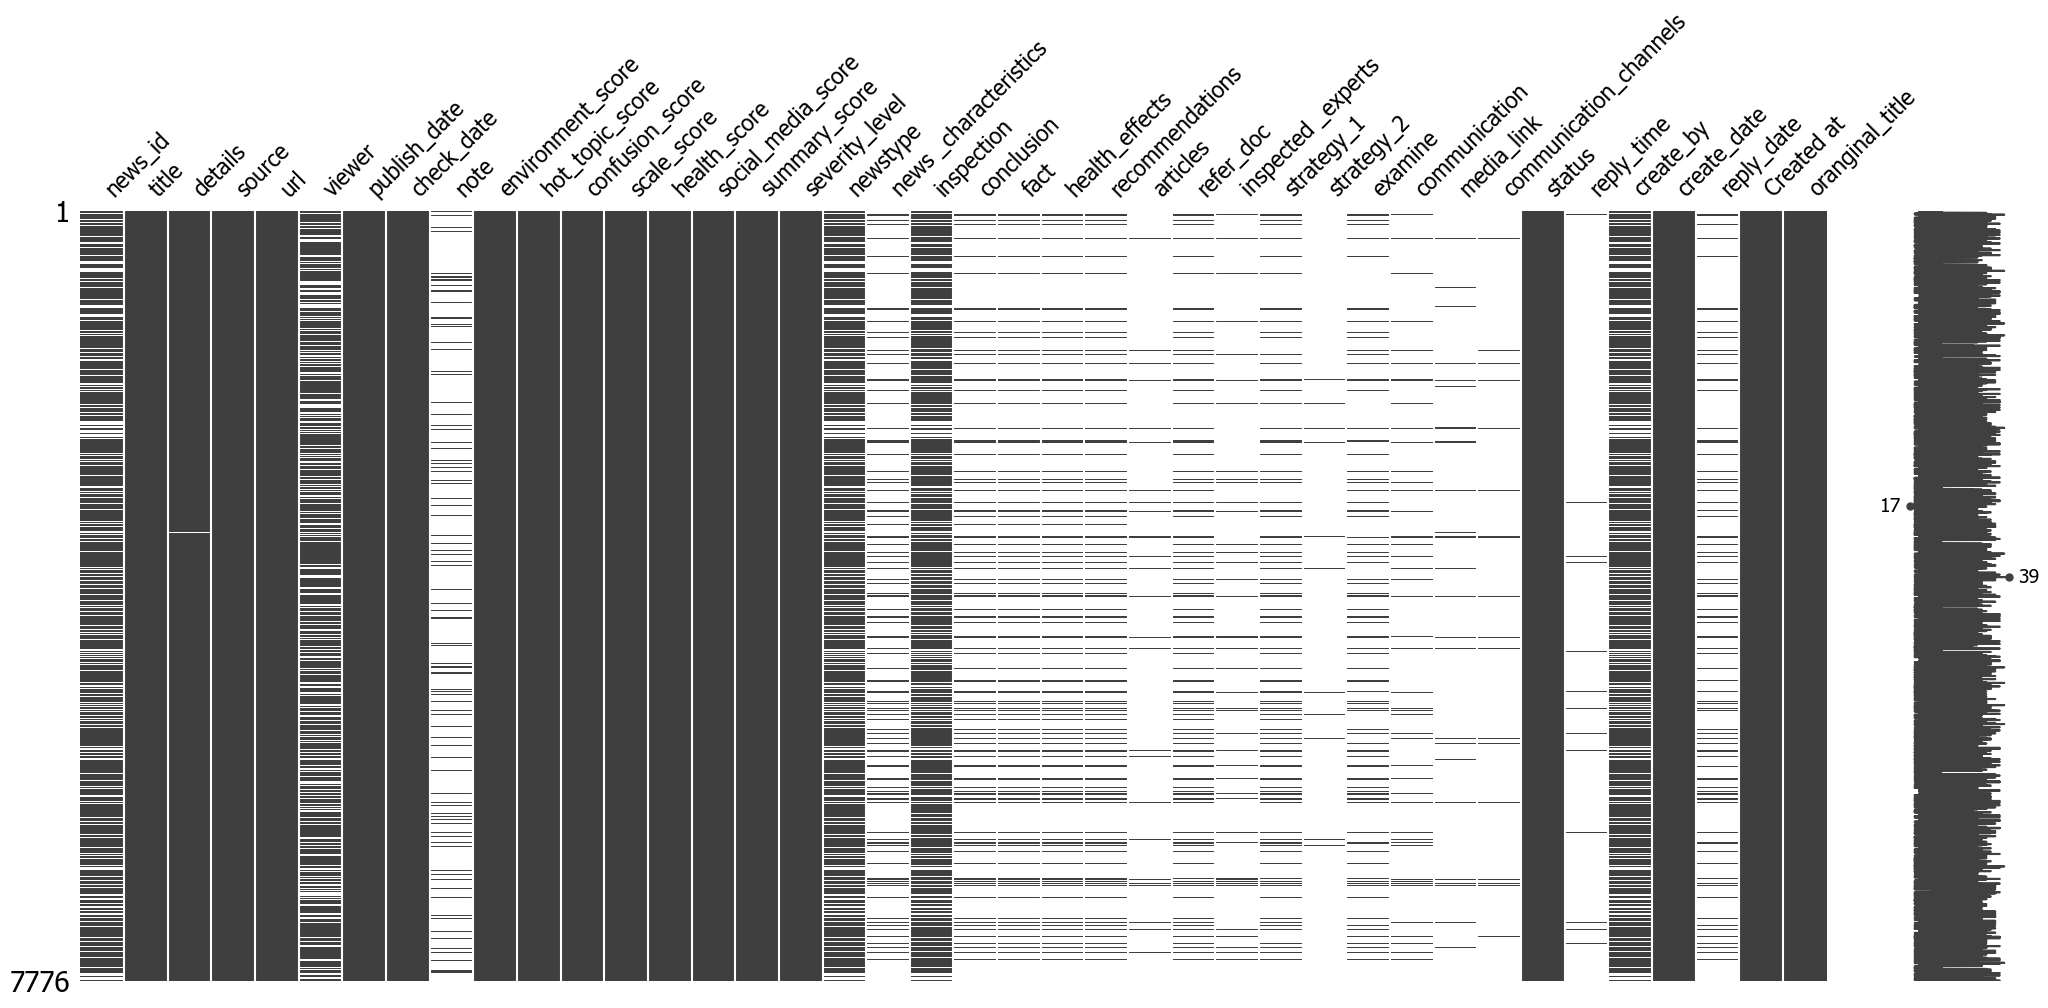

In [4]:
df.info()
missingno.matrix(df)

In [5]:
# Map new newstype
df['newstype'] = df['newstype'].map({
    'อื่นๆ': 'อื่นๆ',
    'โรค': 'โรค',
    'การรักษา': 'การรักษา',
    'อาหารการกิน': 'อาหารการกิน',
    'เกี่ยวกับจิตใจ': 'ครอบครัว',
    'สิ่งแวดล้อม': 'สิ่งแวดล้อม',
    'ครอบครัว': 'ครอบครัว',
    'ยาสูบ': 'อื่นๆ',
    'สินค้าสุขภาพ': 'สินค้าสุขภาพ',
    'แอลกอฮอล์': 'อื่นๆ',
    'เป็นอุบัติเหตุฉุกเฉิน': 'อื่นๆ'
})


In [6]:
# Drop rows with any null (NaN) values
df = df.dropna(subset=['newstype'])
df = df.dropna(subset=['publish_date'])

In [7]:
unique_newstypes = df['newstype'].unique()
for newstype in unique_newstypes:
    top5_titles = df[df['newstype'] == newstype].head(5)['title']
    print(f"5 Titles for {newstype}:")
    for i, title in enumerate(top5_titles, start=1):
        print(f"{i}. {title}")
    print("\n")

5 Titles for อื่นๆ:
1. อากาศร้อนจัดในอินเดียคร่าชีวิตผู้คนไปแล้วอย่างน้อย 25 ราย
2. ทานอาหารเย็นให้เร็วขึ้น ช่วยลดน้ำตาลในเลือด กระตุ้นการเผาผลาญได้มากขึ้น
3. ส่องอาการอันตราย เมื่อออกกำลังกายมากไป
4. ในวง ศบค. ชี้ติดโควิดวันละหมื่น เอาไม่อยู่ คนส่วนใหญ่ยังการ์ดตก จับตายกระดับ!
5. Work from Home อย่างไร .. ไม่ส่งผลร้ายต่อกระดูกและข้อ


5 Titles for โรค:
1. โควิด-19 ผลักคนญี่ปุ่นฆ่าตัวตายมากสุดในรอบ 5 ปี
2. พนักงานเก็บขยะ เสี่ยงติดเชื้อ จากหน้ากากอนามัย
3. เจ้าของตลาดเตาปูน โต้แม่ค้าติดโควิด โชว์ใบรับรองชัด ๆ ยันไม่พบคนติดเชื้อในพื้นที่
4. กลั้นลมหายใจ เช็คการติดเชื้อโรค covid-19
5. ‘สวนดุสิตโพล’ ชี้ 58% คนไทยไม่เห็นด้วยกับการ ‘เปิดประเทศ’


5 Titles for การรักษา:
1. ติดโควิด ให้กินพารา วิต่ามินซี โซดามิ้ืนท์ ฟ้าทะลายโจรฯ รักษาโควิด
2. หลักการดื่มน้ำเพื่อรักษาโรคเหน็บชา หายในเดือนที่ ๓ หลังปฏิบัติติดต่อกัน
3. หากประจำเดือนมาน้อยให้ทานเมล็ดทานตะวัน 1 ช้อนโต๊ะทุกวันกับโยเกิร์ต
4. ...ต่างชาติงง คนไทยจ่ายเงินซื้อวัคซีนโควิด-19 เอง
5. หมอยง เผยโควิดสายพันธุ์อินเดีย ทำให้หลาย ปท.บูสเข็ม 3 วัค

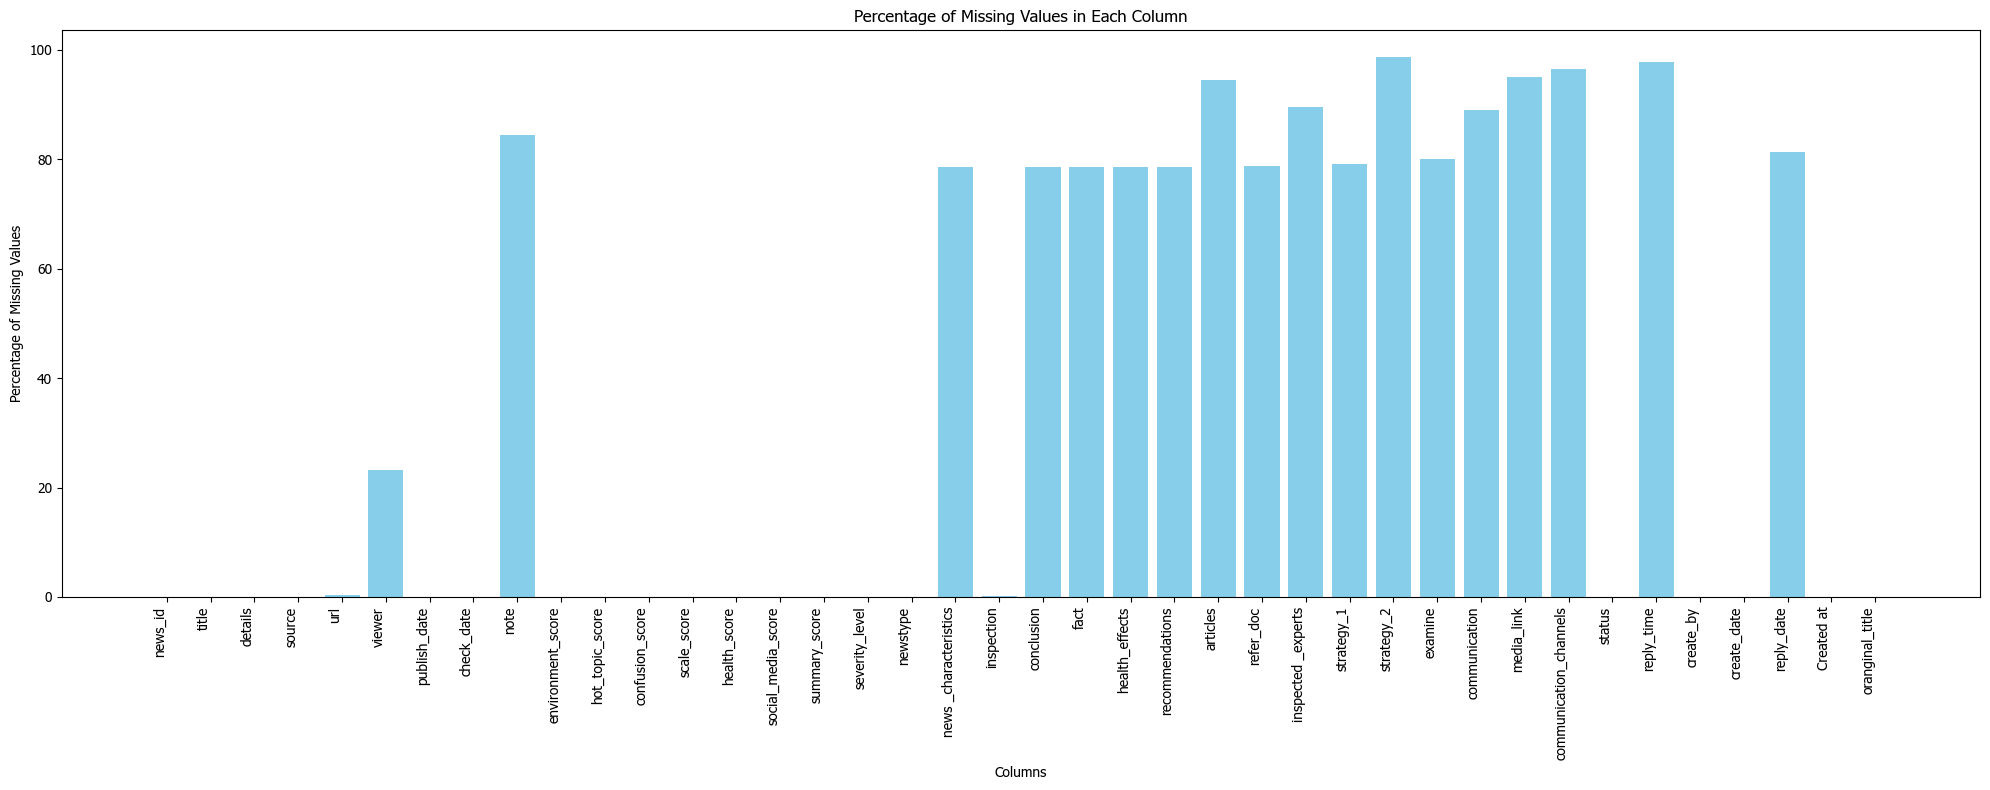

In [8]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
# Set the figure size
plt.figure(figsize=(20, 8))
# Create a bar plot
plt.bar(missing_percentage.index, missing_percentage, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [9]:
# Split the 'publish_date' column into 'Day', 'Month', and 'Year' columns
df[['day', 'month', 'year']] = df['publish_date'].str.split('/', expand=True)


df['day'] = pd.to_numeric(df['day'])
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_numeric(df['year']) - 543 # Convert to Gregorian calendar

In [10]:
df['publish_date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

In [11]:
# Calculate the Interquartile Range (IQR)
Q1 = df['publish_date'].quantile(0.25)
Q3 = df['publish_date'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers based on IQR
IQR_threshold = 1.5
# Remove rows with dates beyond the IQR threshold
df = df[(df['publish_date'] >= Q1 - IQR_threshold * IQR) & (df['publish_date'] <= Q3 + IQR_threshold * IQR)]

In [12]:
unique_year = df['year'].unique()
for year in unique_year:
    top5_titles = df[df['year'] == year].head(5)['title']
    print(f"5 Titles for {year}:")
    for i, title in enumerate(top5_titles, start=1):
        print(f"{i}. {title}")
    print("\n")

5 Titles for 2022:
1. อากาศร้อนจัดในอินเดียคร่าชีวิตผู้คนไปแล้วอย่างน้อย 25 ราย
2. ฉลองสงกรานต์ เลือกทานอาหารอย่างไรไม่ให้ "ท้องเสีย"
3. หากประจำเดือนมาน้อยให้ทานเมล็ดทานตะวัน 1 ช้อนโต๊ะทุกวันกับโยเกิร์ต
4. "ห้ามผู้หญิงกินหอยแครง ก่อมะเร็ง" ?
5. กินชานมไข่มุกบ่อยๆ เป็นอาหารอันตรายไหม?


5 Titles for 2020:
1. โควิด-19 ผลักคนญี่ปุ่นฆ่าตัวตายมากสุดในรอบ 5 ปี
2. หลักการดื่มน้ำเพื่อรักษาโรคเหน็บชา หายในเดือนที่ ๓ หลังปฏิบัติติดต่อกัน
3. น้ำกระเทียมโทนผสมกันนมเปรี้ยวดื่ม ป้องกันเส้นเลือดตีบ
4. เจ้าของตลาดเตาปูน โต้แม่ค้าติดโควิด โชว์ใบรับรองชัด ๆ ยันไม่พบคนติดเชื้อในพื้นที่
5. ทานอาหารเย็นให้เร็วขึ้น ช่วยลดน้ำตาลในเลือด กระตุ้นการเผาผลาญได้มากขึ้น


5 Titles for 2021:
1. ติดโควิด ให้กินพารา วิต่ามินซี โซดามิ้ืนท์ ฟ้าทะลายโจรฯ รักษาโควิด
2. พนักงานเก็บขยะ เสี่ยงติดเชื้อ จากหน้ากากอนามัย
3. กลั้นลมหายใจ เช็คการติดเชื้อโรค covid-19
4. ‘สวนดุสิตโพล’ ชี้ 58% คนไทยไม่เห็นด้วยกับการ ‘เปิดประเทศ’
5. เช็กเลย! คุณเป็นกลุ่มเสี่ยง "ภาวะหัวใจหยุดเต้น" ขณะเล่นกีฬาหรือไม่?


5 Titles for 2019:
1. ดวงตา สาม

In [13]:
def get_season(month):
    if month in [11,12,1]:
        return 'winter'
    elif month in [2,3,4,5]:
        return 'summer'
    elif month in [6,7,8,9,10]:
        return 'rainny'
    else:
        return 'unknown'

In [14]:
# Assuming df['month'] contains the month values
df['season'] = df['month'].apply(get_season)

In [15]:
unique_season = df['season'].unique()
for season in unique_season:
    top5_titles = df[df['season'] == season].head(5)['title']
    print(f"5 Titles for {season}:")
    for i, title in enumerate(top5_titles, start=1):
        print(f"{i}. {title}")
    print("\n")

5 Titles for summer:
1. อากาศร้อนจัดในอินเดียคร่าชีวิตผู้คนไปแล้วอย่างน้อย 25 ราย
2. ติดโควิด ให้กินพารา วิต่ามินซี โซดามิ้ืนท์ ฟ้าทะลายโจรฯ รักษาโควิด
3. พนักงานเก็บขยะ เสี่ยงติดเชื้อ จากหน้ากากอนามัย
4. กลั้นลมหายใจ เช็คการติดเชื้อโรค covid-19
5. ฉลองสงกรานต์ เลือกทานอาหารอย่างไรไม่ให้ "ท้องเสีย"


5 Titles for winter:
1. โควิด-19 ผลักคนญี่ปุ่นฆ่าตัวตายมากสุดในรอบ 5 ปี
2. หลักการดื่มน้ำเพื่อรักษาโรคเหน็บชา หายในเดือนที่ ๓ หลังปฏิบัติติดต่อกัน
3. เจ้าของตลาดเตาปูน โต้แม่ค้าติดโควิด โชว์ใบรับรองชัด ๆ ยันไม่พบคนติดเชื้อในพื้นที่
4. หากประจำเดือนมาน้อยให้ทานเมล็ดทานตะวัน 1 ช้อนโต๊ะทุกวันกับโยเกิร์ต
5. ทำความรู้จัก 6 ประเภท "วัคซีนโควิด-19" มีอะไรบ้าง ก่อนฉีดในปี 2021


5 Titles for rainny:
1. น้ำกระเทียมโทนผสมกันนมเปรี้ยวดื่ม ป้องกันเส้นเลือดตีบ
2. ‘สวนดุสิตโพล’ ชี้ 58% คนไทยไม่เห็นด้วยกับการ ‘เปิดประเทศ’
3. ทานอาหารเย็นให้เร็วขึ้น ช่วยลดน้ำตาลในเลือด กระตุ้นการเผาผลาญได้มากขึ้น
4. เช็กเลย! คุณเป็นกลุ่มเสี่ยง "ภาวะหัวใจหยุดเต้น" ขณะเล่นกีฬาหรือไม่?
5. ทำไมเชื้อโควิดจ้องโจมตีปอด




In [16]:
# List of columns to drop
columns_to_drop = ['news_id',
                   'check_date',
                   'viewer',
                   'note',
                   'news _characteristics',
                   'inspection',
                   'conclusion',
                   'fact',
                   'health_effects',
                   'recommendations',
                   'articles',
                   'refer_doc',
                   'inspected _experts',
                   'strategy_1',
                   'strategy_2',
                   'examine',
                   'communication',
                   'media_link',
                   'communication_channels',
                   'status',
                   'reply_time',
                   'create_by',
                   'create_date',
                   'reply_date',
                   'Created at',
                   'url',
                   'source',
                   'environment_score',
                   'hot_topic_score',
                   'confusion_score',
                   'scale_score',
                   'health_score',
                   'social_media_score',
                   'summary_score',
                   ]


# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [17]:
def remove_stopwords(text):
    words = word_tokenize(text, engine="newmm")
    filtered_words = [word for word in words if word not in thai_stopwords()]
    return ' '.join(filtered_words)

In [18]:
def clean_text(row):
  string_row = str(row) # tostring
  string_row = string_row.replace(" ", "") #remove space
  string_row = string_row.replace("©", "") #remove space
  string_row = string_row.replace('"', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('‘', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('’', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('“', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('”', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('–', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace('—', "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace("‼", "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace("…", ",") #remove
  string_row = string_row.replace("⁉", "") #remove
  string_row = string_row.replace("?", "") #remove
  string_row = string_row.replace("฿", "") #remove
  string_row = string_row.replace("!", "") #remove
  string_row = string_row.replace("•", "") #remove
  string_row = string_row.replace("-", "") #remove
  string_row = string_row.replace("'", "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace(".", "") #remove other punctuation (not in string.punctuation)
  string_row = string_row.replace(",", "") #remove other punctuation (not in string.punctuation)
  return string_row

In [19]:
# Remove punctuation from the 'title' column
df['title'] = df['title'].str.replace('[{}]'.format(string.punctuation), '')
df['details'] = df['details'].str.replace('[{}]'.format(string.punctuation), '')
# Remove numbers from the 'title' column
df['title'] = df['title'].str.replace('\d+', '', regex=True)
df['details'] = df['details'].str.replace('\d+', '', regex=True)

df['title'] = df['title'].apply(clean_text)
df['details'] = df['details'].apply(clean_text)


df['title'] = df['title'].apply(remove_stopwords)
df['details'] = df['details'].apply(remove_stopwords)

df['title'] = df['title'].apply(lambda x: word_tokenize(x))
df['details'] = df['details'].apply(lambda x: word_tokenize(x))

df['title'] = df['title'].apply(lambda l: [el for el in l if len(el.replace(' ', '')) > 0])
df['details'] = df['details'].apply(lambda l: [el for el in l if len(el.replace(' ', '')) > 0])

df['title'] = df['title'].apply(lambda l: [normalize(el) for el in l])
df['details'] = df['details'].apply(lambda l: [normalize(el) for el in l])

df['title'] = df['title'].apply(lambda l: ' '.join(l))
df['details'] = df['details'].apply(lambda l: ' '.join(l))

**EDA**

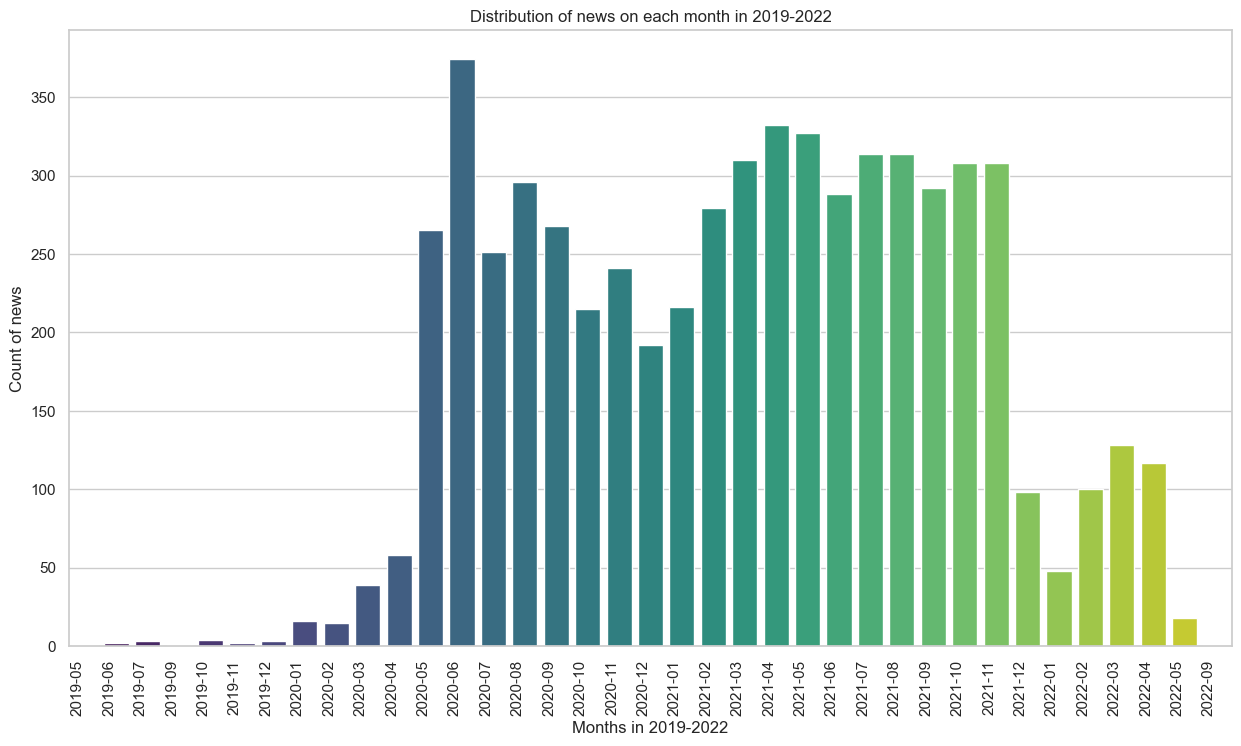

In [46]:
# create a representation of the month with strfmt
df = df.dropna(subset=['publish_date'])
df['year_month_of_publish_date'] = df['publish_date'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = df.groupby('year_month_of_publish_date').size().to_frame("count").reset_index()

# Set seaborn style
sns.set(style="whitegrid")

# Create a more beautiful bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='year_month_of_publish_date', y='count', data=grouped_df, palette='viridis')
plt.xlabel('Months in 2019-2022')
plt.ylabel('Count of news')
plt.title('Distribution of news on each month in 2019-2022')
plt.xticks(rotation=90, ha='right')
plt.show()

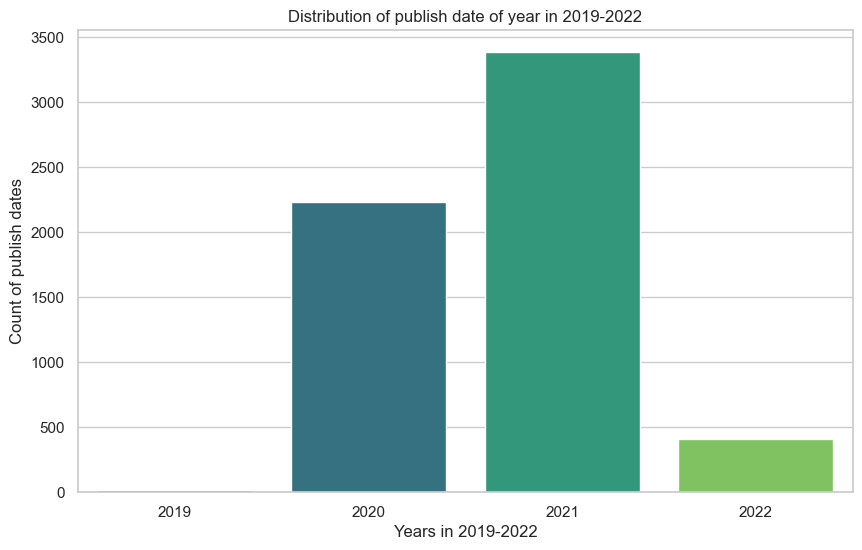

In [42]:
# Plot the distribution of years
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Distribution of publish date of year in 2019-2022')
plt.xlabel('Years in 2019-2022')
plt.ylabel('Count of publish dates')
plt.show()

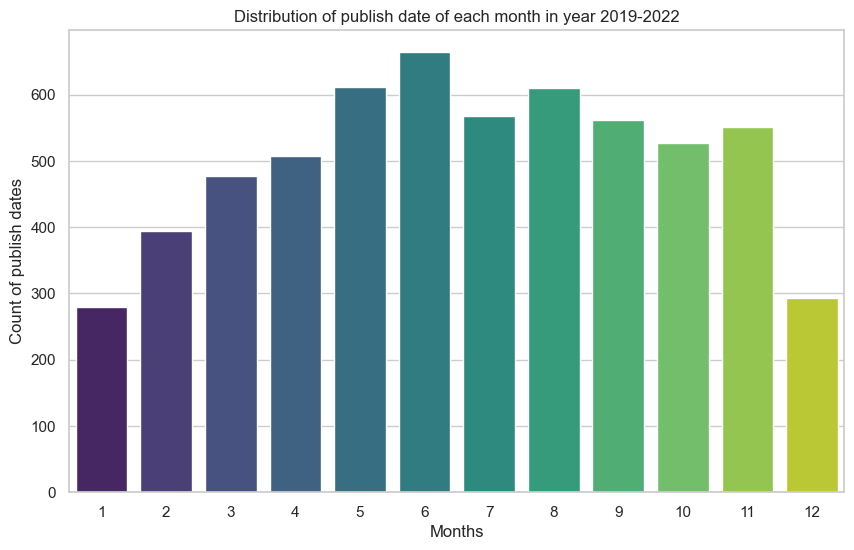

In [43]:
# Plot the distribution of months after removing outliers
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Distribution of publish date of each month in year 2019-2022')
plt.xlabel('Months')
plt.ylabel('Count of publish dates')
plt.show()

C:\Users\Chonn\AppData\Local\Temp\ipykernel_29636\2655017859.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='word_count', bins=20, palette='viridis', kde=True)
C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


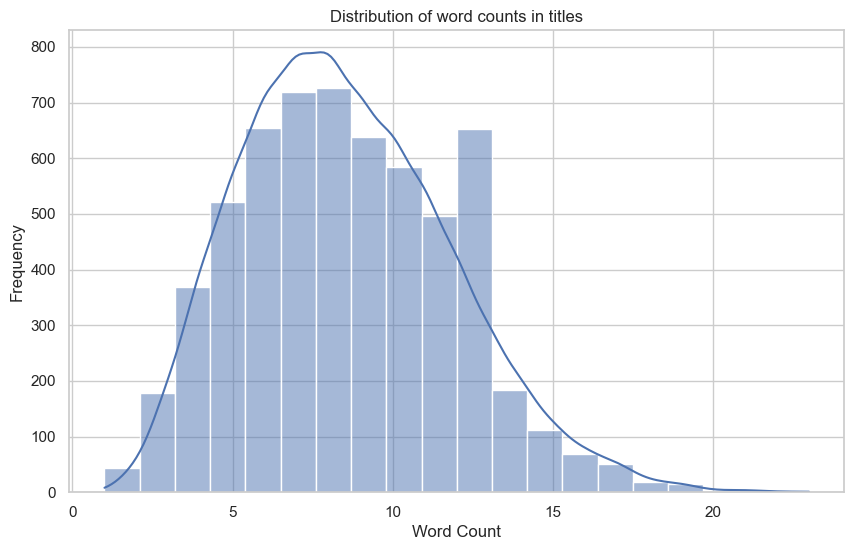

In [23]:
# Calculate word count for each entry in the 'title' column
df['word_count'] = df['title'].apply(lambda x: len(x.split()))

# Set Seaborn style
sns.set(style="whitegrid")

# Explore the distribution of word counts with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', bins=20, palette='viridis', kde=True)
plt.title('Distribution of word counts in titles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\Chonn\AppData\Local\Temp\ipykernel_29636\1273575848.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='word_count_details', palette='viridis', kde=True)
C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


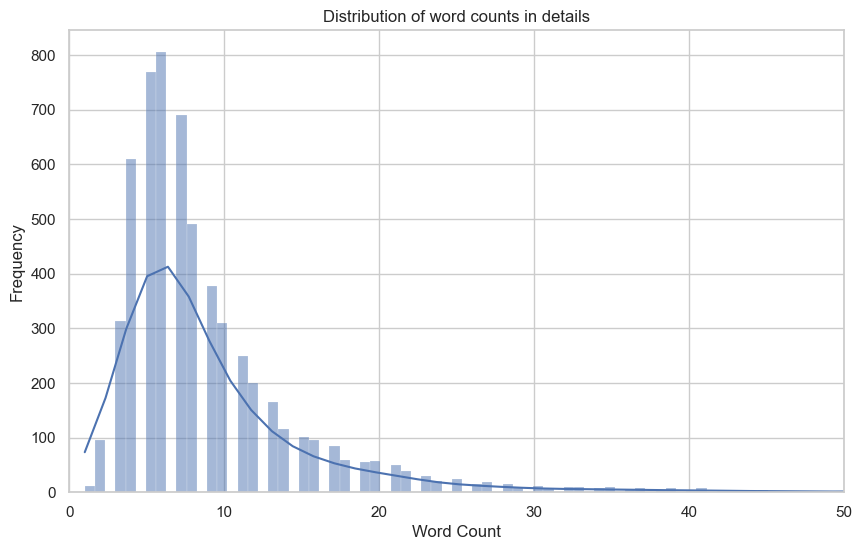

In [54]:
# Calculate word count for each entry in the 'title' column
df['word_count_details'] = df['details'].apply(lambda x: len(x.split()))

# Set Seaborn style
sns.set(style="whitegrid")

# Explore the distribution of word counts with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count_details', palette='viridis', kde=True)
plt.title('Distribution of word counts in details')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 50) 
plt.show()

In [25]:
mpl.font_manager.fontManager.addfont('../../../../OneDrive/Documents/tahoma.ttf')
mpl.rc('font', family='tahoma',size = 20)

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


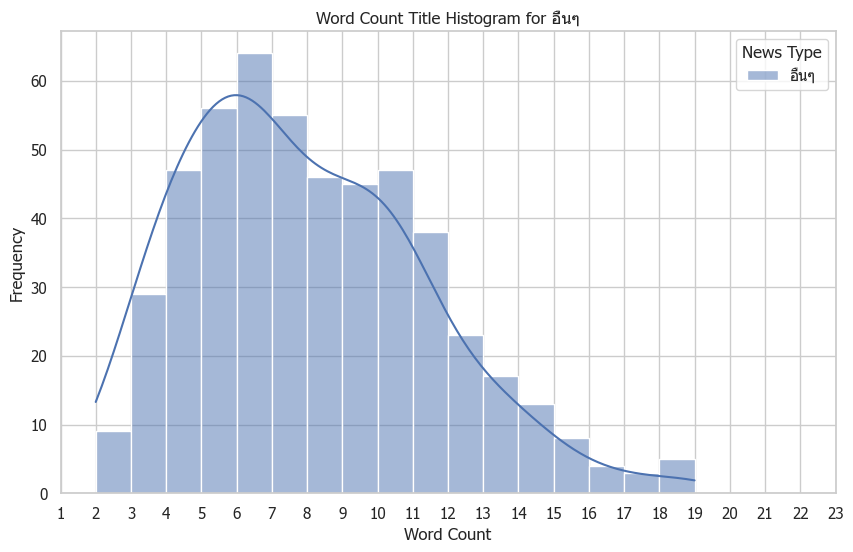

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


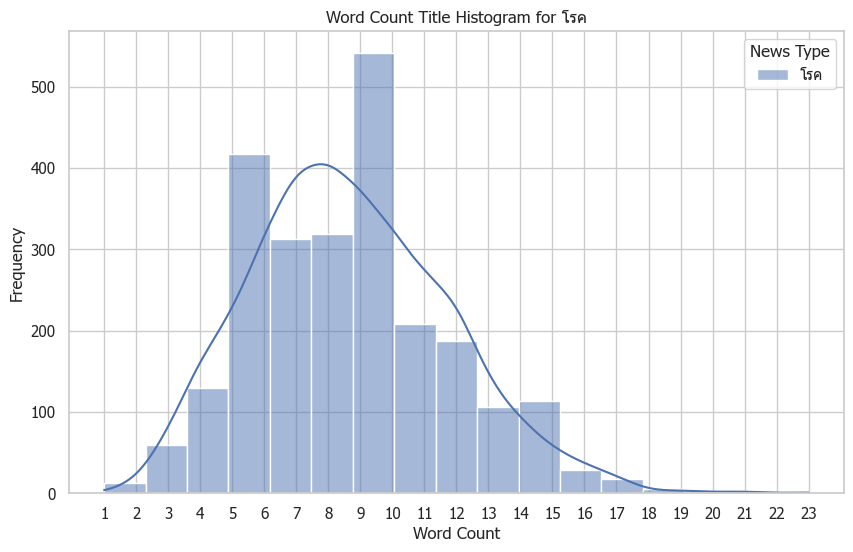

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


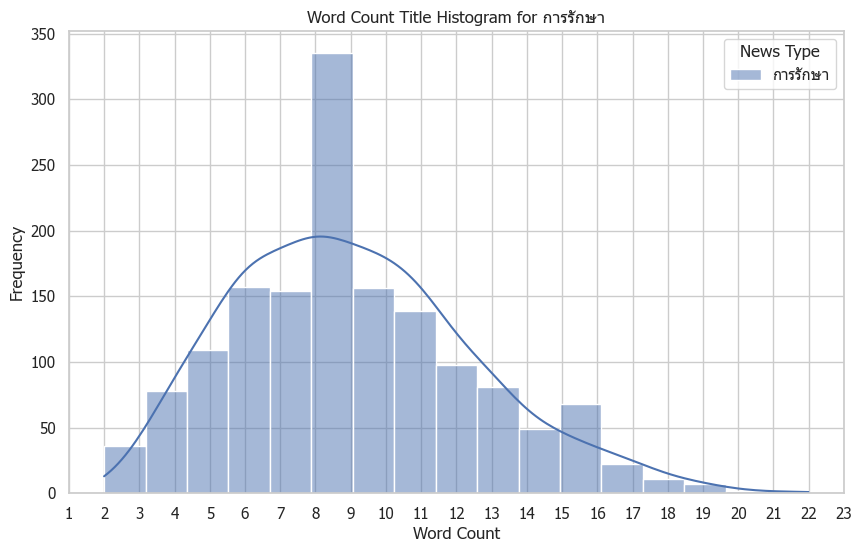

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


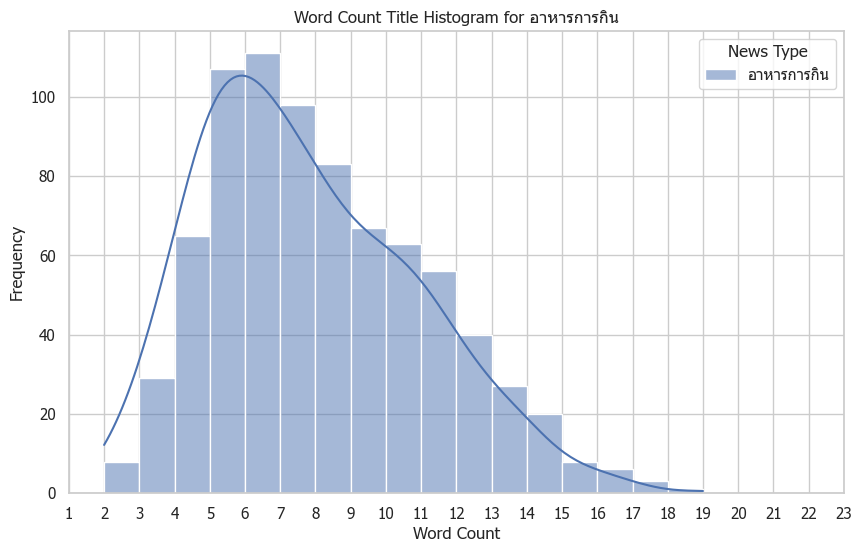

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


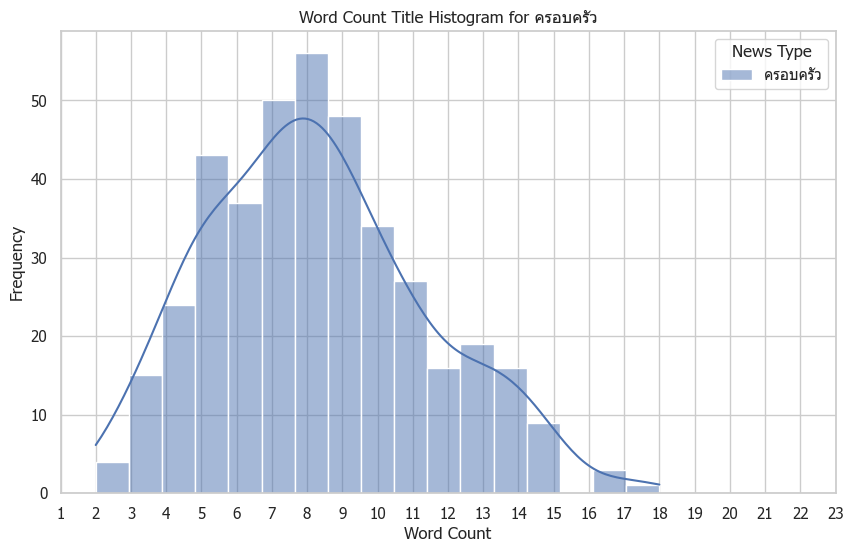

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


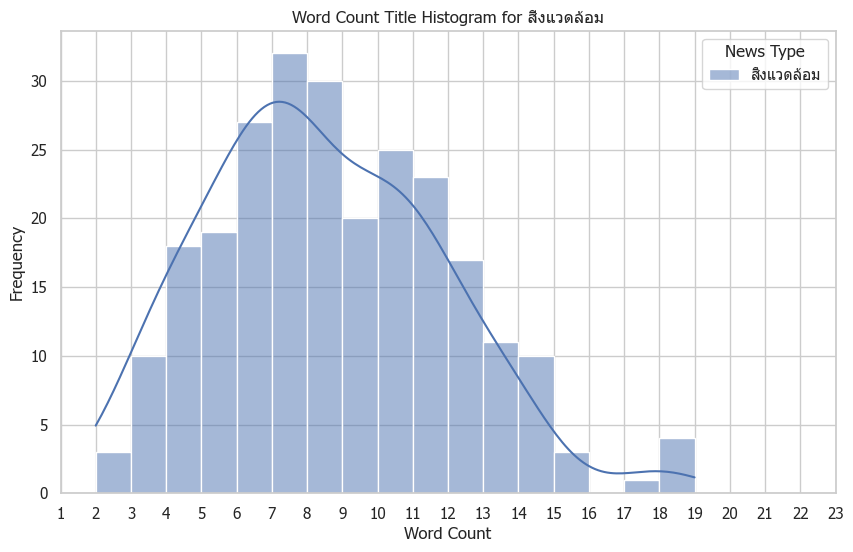

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


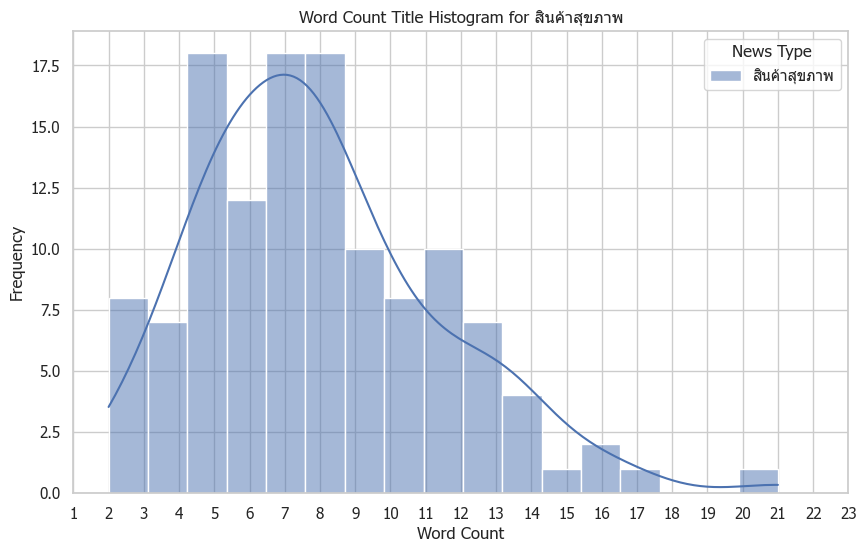

In [26]:
# Get unique newstypes
unique_newstypes = df['newstype'].unique()

# Create a separate histogram for each newstype using a for loop

for newstype in unique_newstypes:
    plt.figure(figsize=(10, 6))
    subset = df[df['newstype'] == newstype]
    sns.histplot(data=subset, x='word_count', bins=17, label=newstype, kde=True)
    plt.title(f"Word Count Title Histogram for {newstype}")
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend(title='News Type')
    # Set x-axis ticks as integers
    plt.xticks(range(int(df['word_count'].min()), int(df['word_count'].max()) + 1))
    plt.show()

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


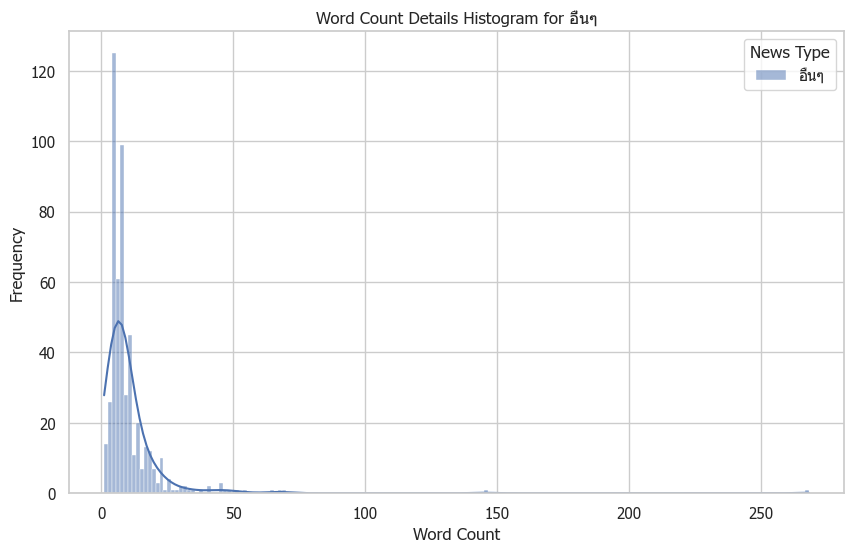

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


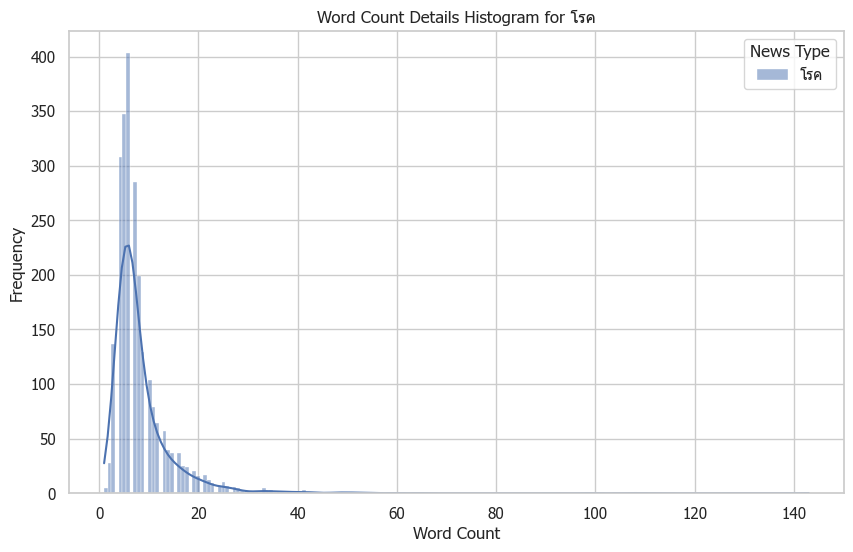

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


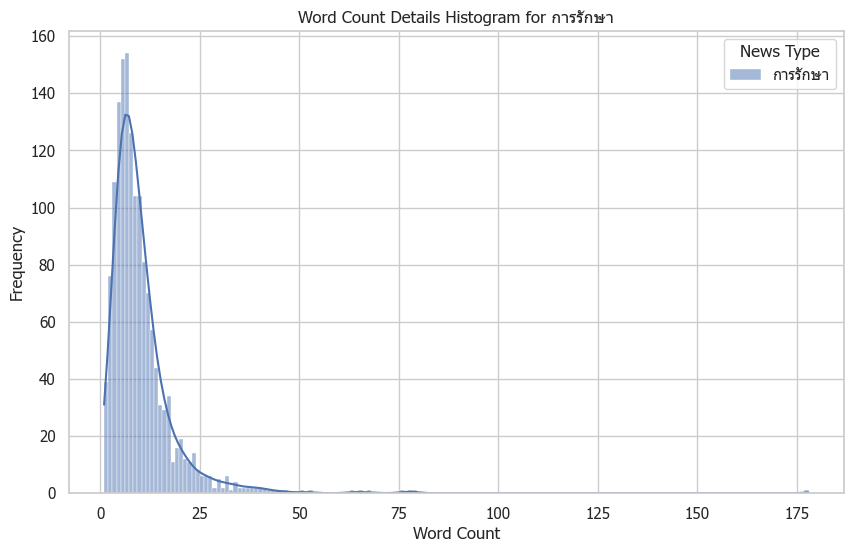

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


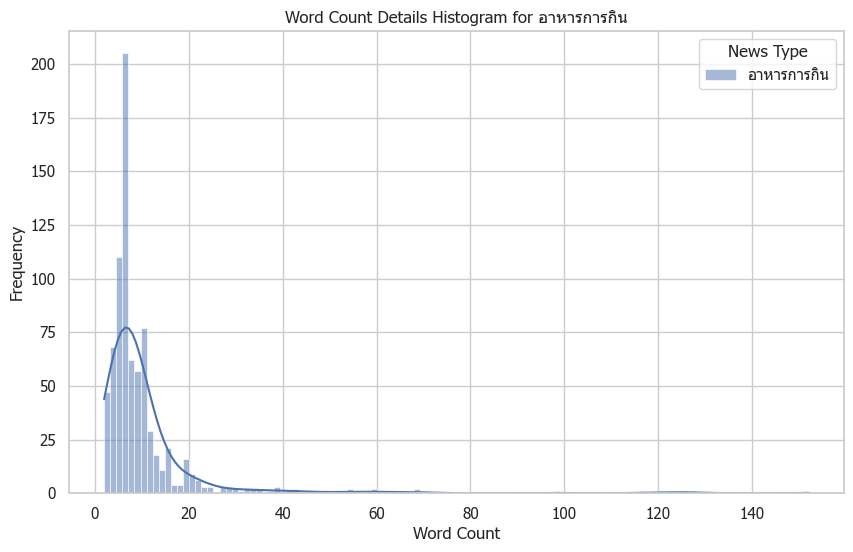

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


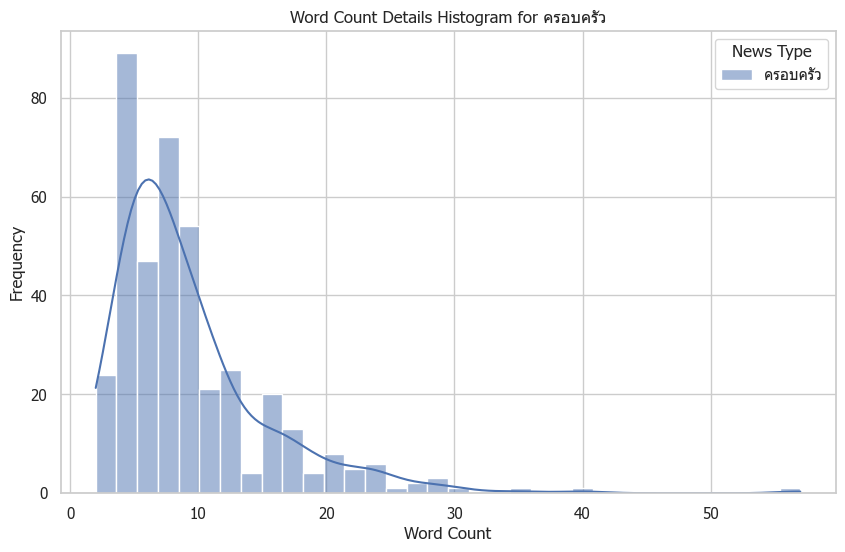

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


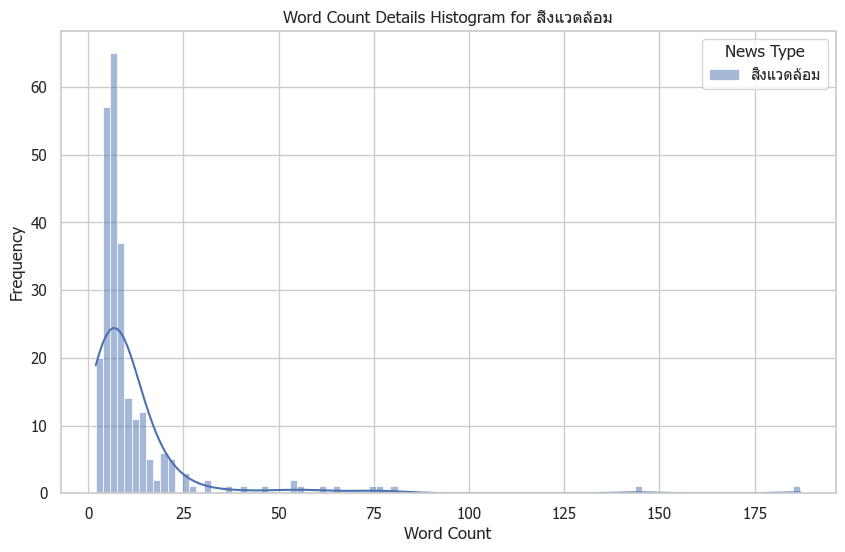

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


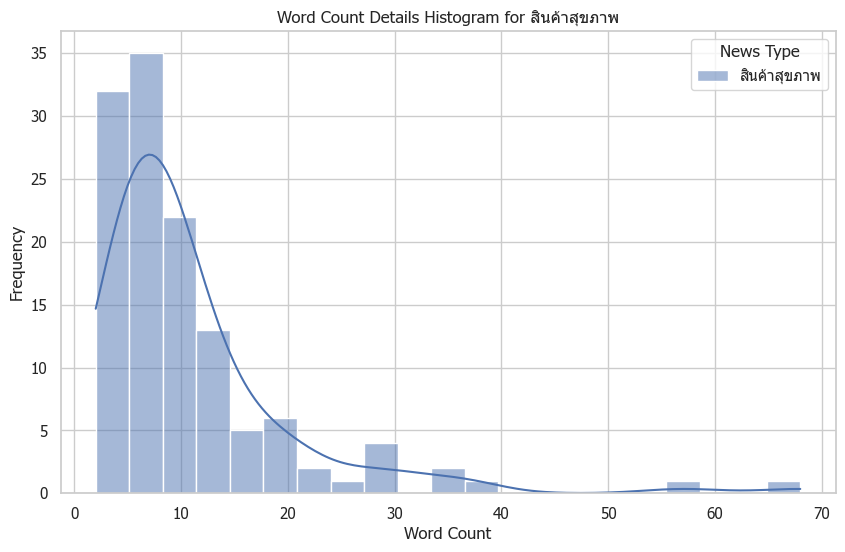

In [27]:

# Create a separate histogram for each newstype using a for loop
for newstype in unique_newstypes:
    plt.figure(figsize=(10, 6))
    subset = df[df['newstype'] == newstype]
    sns.histplot(data=subset, x='word_count_details', label=newstype, kde=True)
    plt.title(f"Word Count Details Histogram for {newstype}")
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend(title='News Type')

    plt.show()


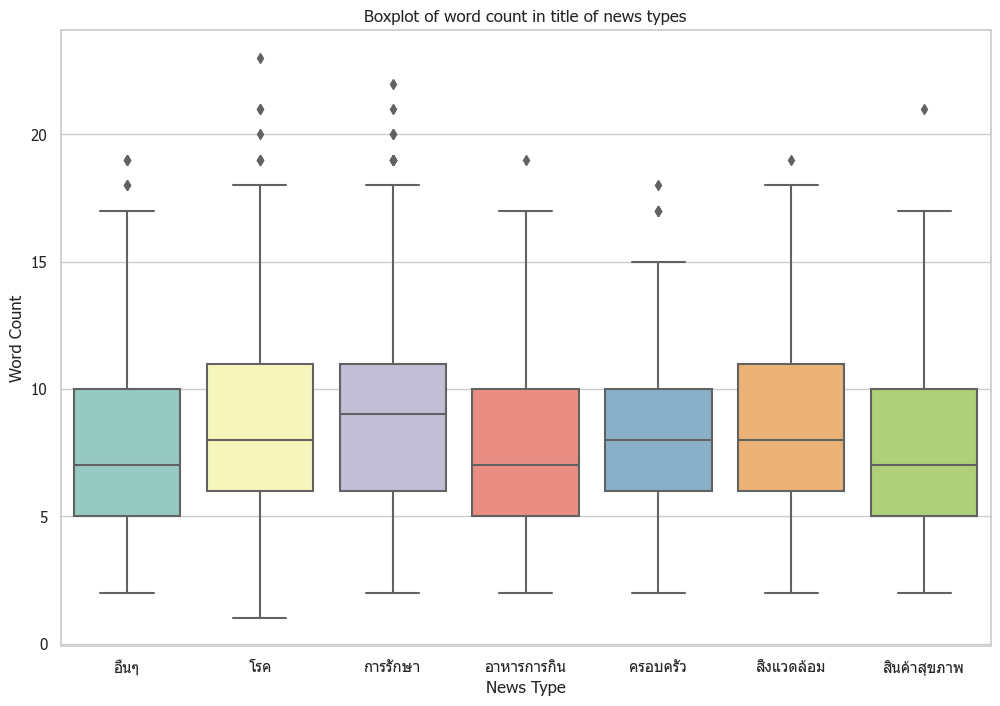

In [28]:
# Create a boxplot using seaborn
plt.figure(figsize=(12, 8))

sns.boxplot(x='newstype', y='word_count', data=df, palette="Set3")

# Add labels and title
plt.xlabel("News Type")
plt.ylabel("Word Count")
plt.title("Boxplot of word count in title of news types")

# Show the plot
plt.show()

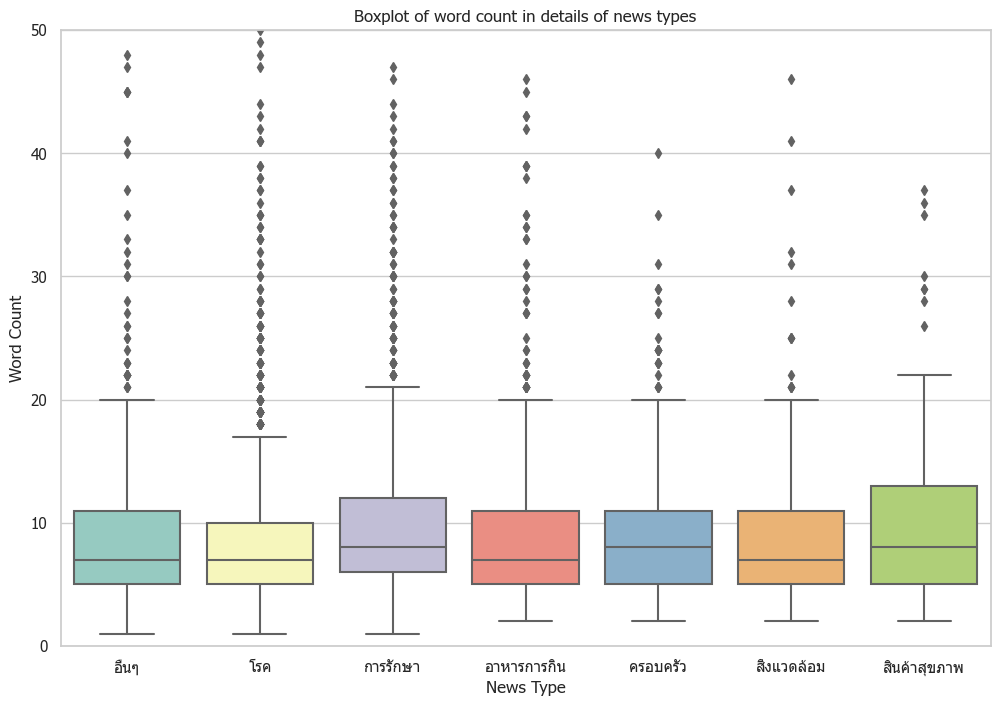

In [51]:
# Create a boxplot using seaborn
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'tahoma'
sns.boxplot(x='newstype', y='word_count_details', data=df, palette="Set3")
plt.ylim(0, 50)  

# Add labels and title
plt.xlabel("News Type")
plt.ylabel("Word Count")
plt.title("Boxplot of word count in details of news types")

# Show the plot
plt.show()

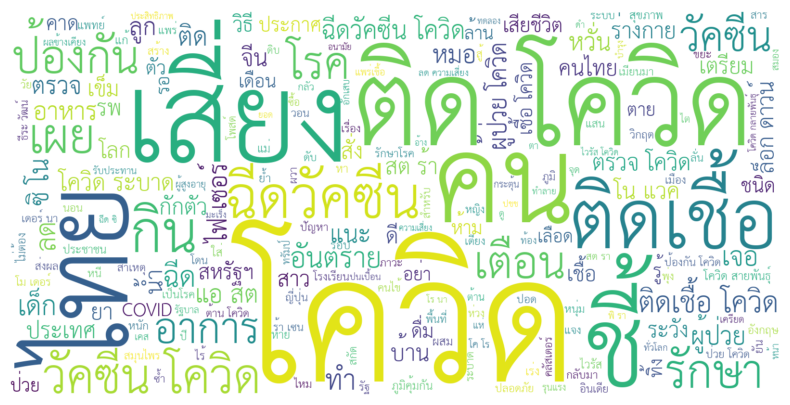

In [30]:
# Tokenize each sentence in the 'TextColumn'
tokenized_texts = df['title'].apply(word_tokenize, engine='newmm')


all_words = [word for sublist in tokenized_texts for word in sublist]

# Concatenate all texts in the 'TextColumn' into a single string
all_text = ''.join(all_words)

# Set a font that supports Thai characters
font_path = "../../../../OneDrive/Documents/THSarabunNew.ttf"

# Generate a word cloud with the specified font
wordcloud = WordCloud(width=1600, height=800, background_color='white',regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", font_path=font_path).generate(all_text)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

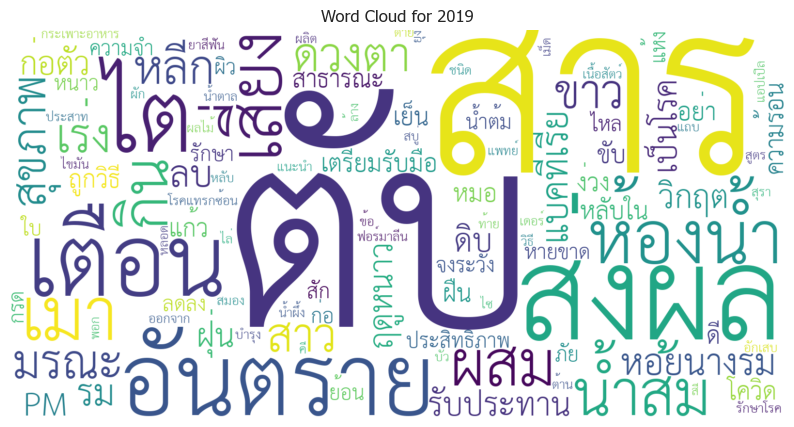

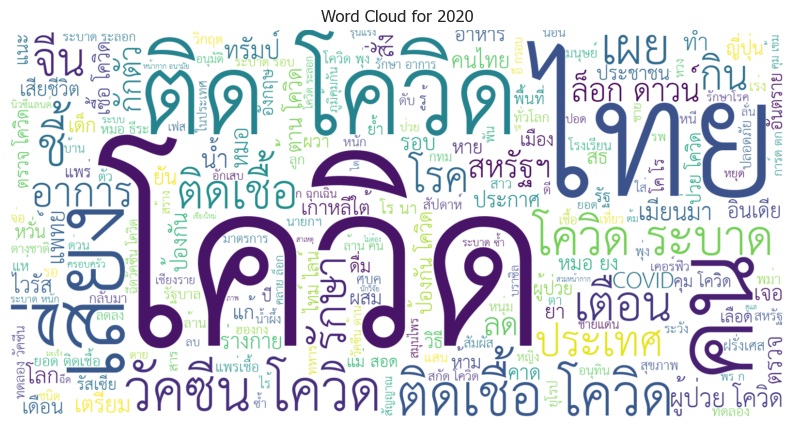

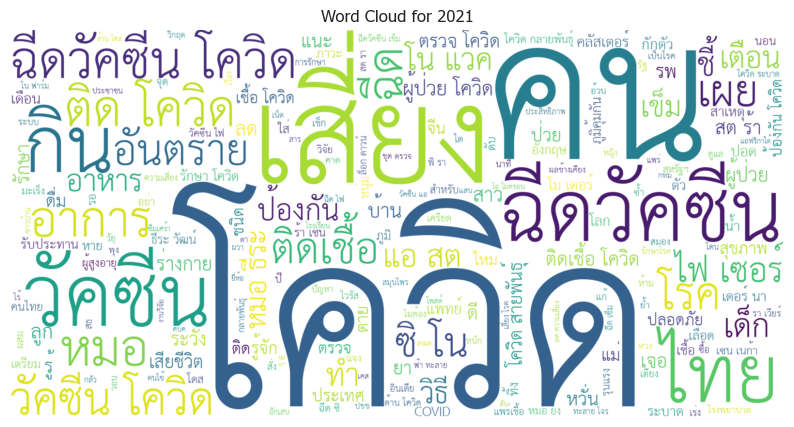

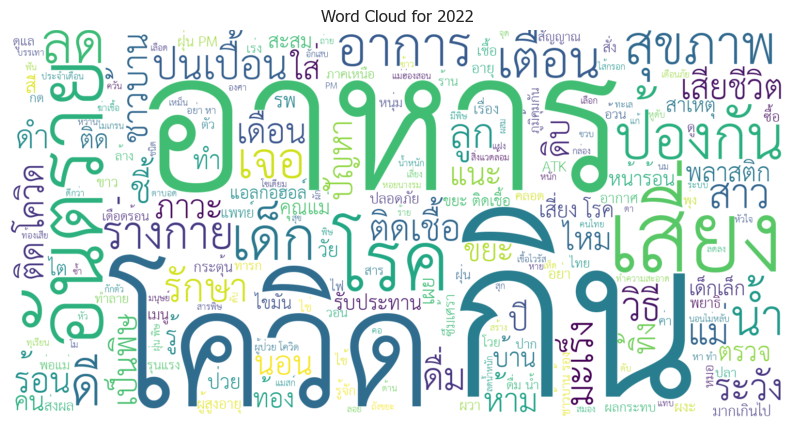

In [31]:
# Group by year and aggregate title
grouped_df = df.groupby('year')['title'].apply(lambda x: ' '.join(x)).reset_index()

# Generate word cloud for each year
for index, row in grouped_df.iterrows():
    year = row['year']
    title = row['title']

    # Set a font that supports Thai characters
    font_path = "../../../../OneDrive/Documents/THSarabunNew.ttf"
    # Generate a word cloud with the specified font
    wordcloud = WordCloud(width=1600, height=800, background_color='white',regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", font_path=font_path).generate(title)

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {year}')
    plt.axis('off')
    plt.show()

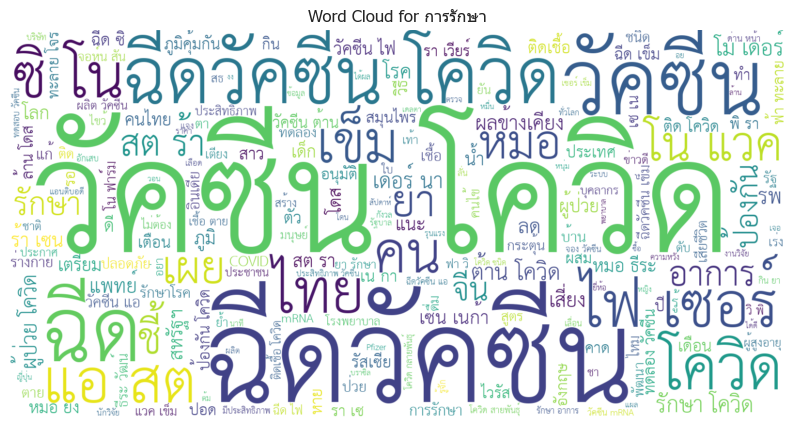

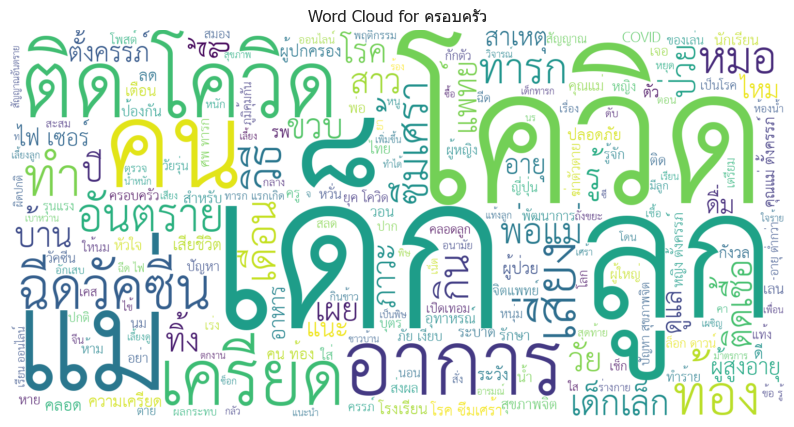

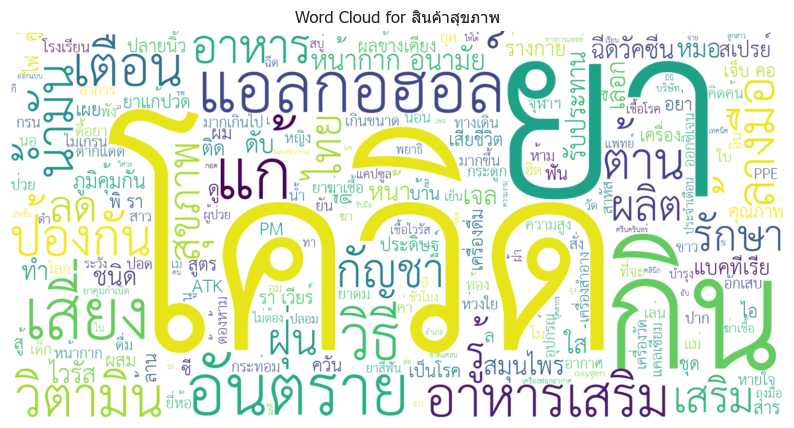

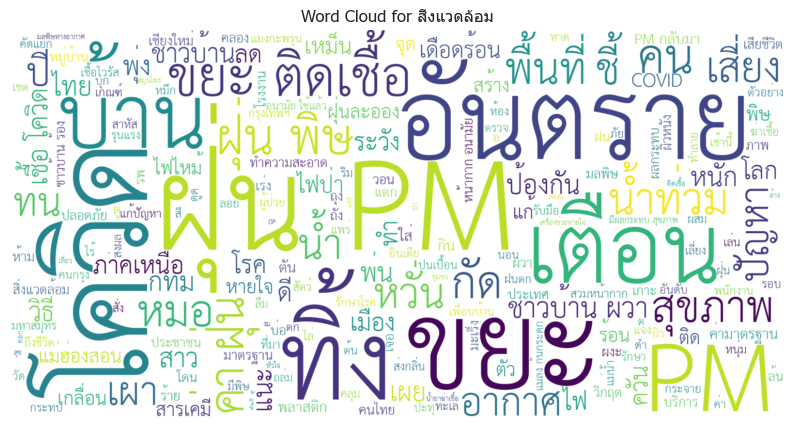

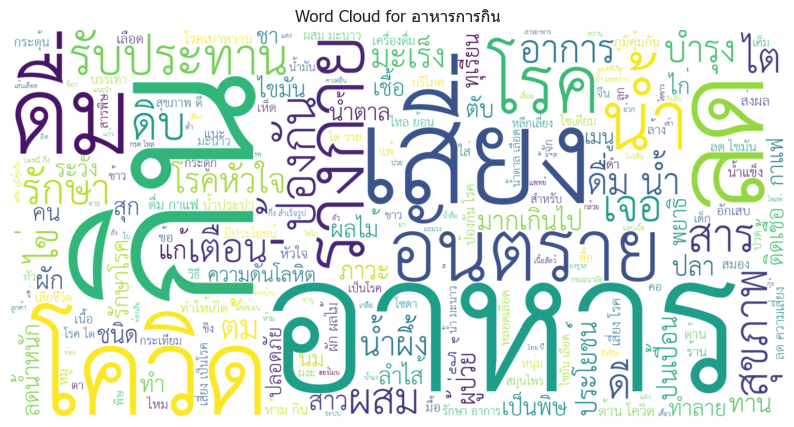

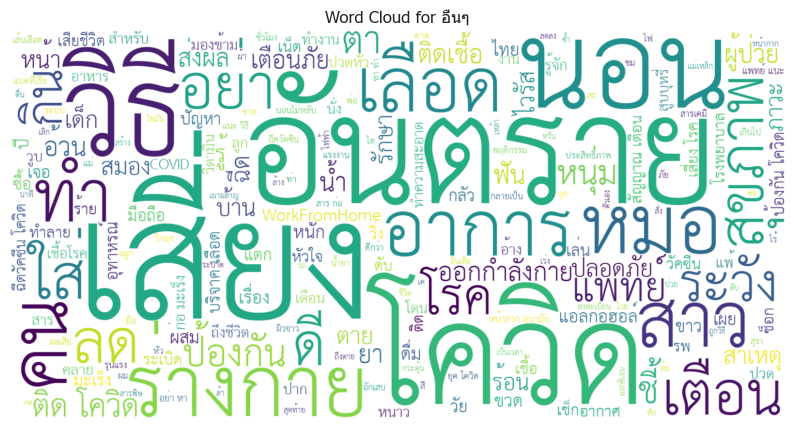

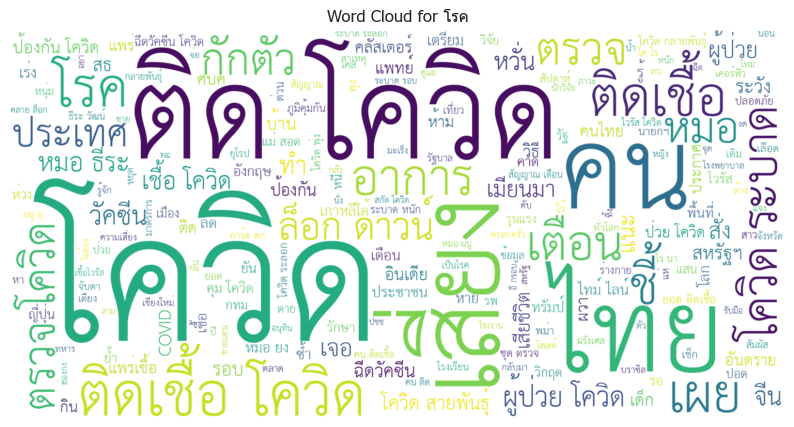

In [32]:
# Group by year and aggregate topics
grouped_df = df.groupby('newstype')['title'].apply(lambda x: ' '.join(x)).reset_index()

# Generate word cloud for each newstype
for index, row in grouped_df.iterrows():
    newstype = row['newstype']
    title = row['title']

    # Set a font that supports Thai characters
    font_path = "../../../../OneDrive/Documents/THSarabunNew.ttf"
    # Generate a word cloud with the specified font
    wordcloud = WordCloud(width=1600, height=800, background_color='white',regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", font_path=font_path).generate(title)

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {newstype}')
    plt.axis('off')
    plt.show()

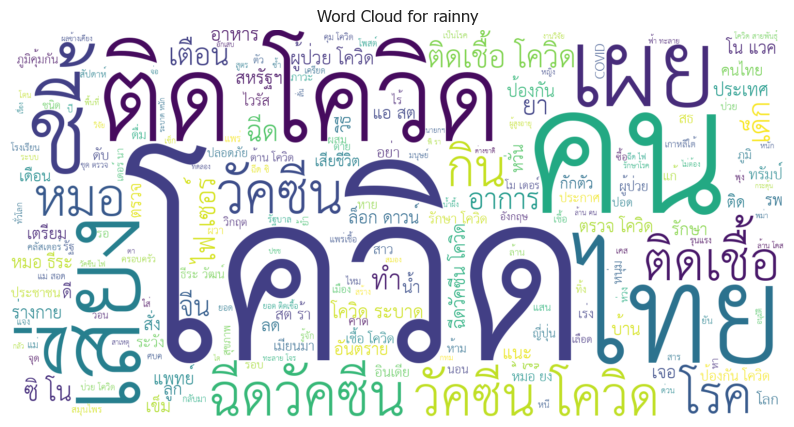

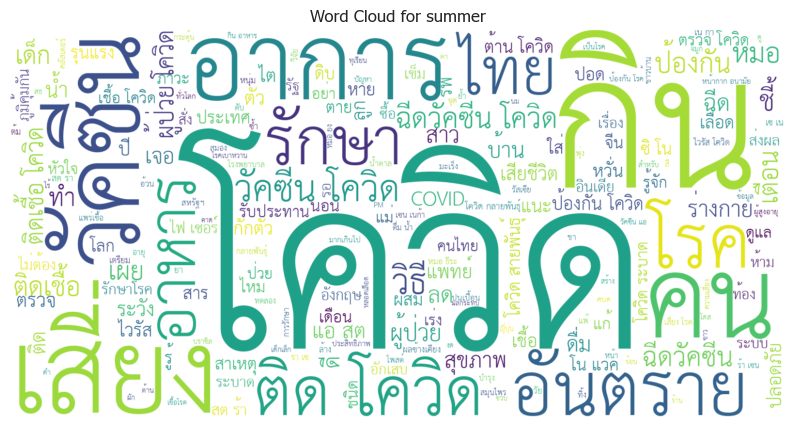

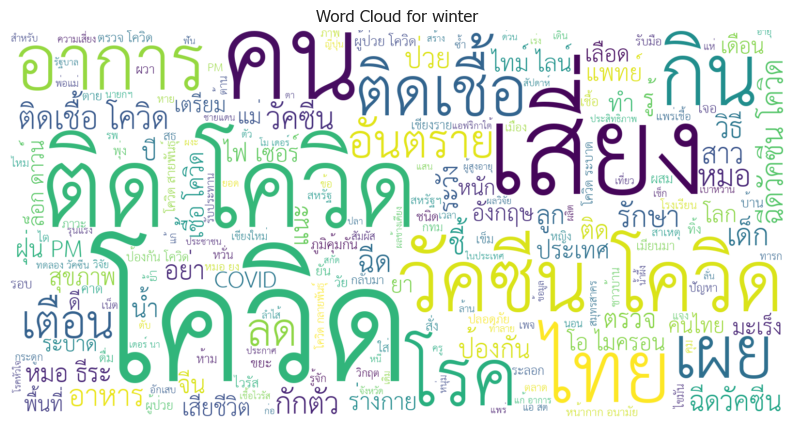

In [33]:
# Group by season and aggregate topics
grouped_df = df.groupby('season')['title'].apply(lambda x: ' '.join(x)).reset_index()

# Generate word cloud for each season
for index, row in grouped_df.iterrows():
    season = row['season']
    title = row['title']

    # Generate a word cloud with the specified font
    wordcloud = WordCloud(width=1600, height=800, background_color='white',regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", font_path=font_path).generate(title)

    # Plot the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {season}')
    plt.axis('off')
    plt.show()

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


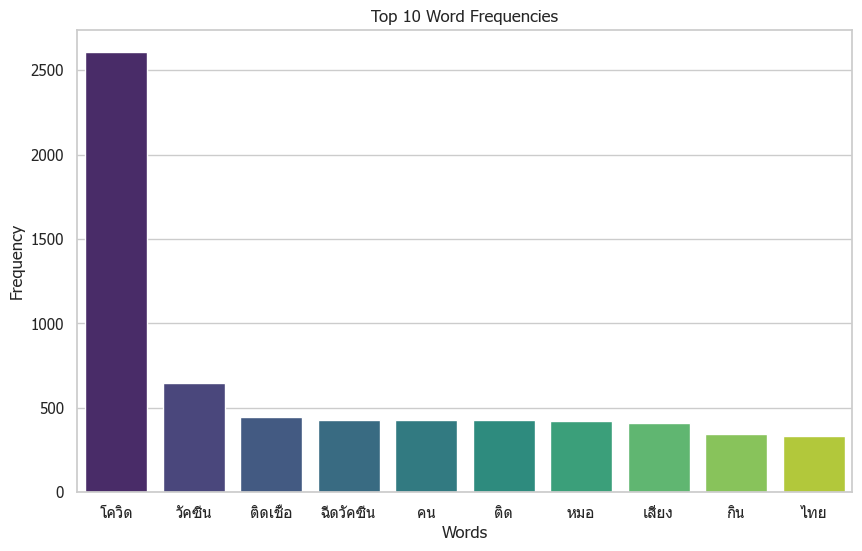

In [34]:
# Flatten the list of tokenized words
all_words = [word for sublist in tokenized_texts for word in sublist]

# Calculate word frequencies
freq_dist = FreqDist(all_words)

# Remove the most common word
most_common_word = freq_dist.most_common(1)[0][0]
tokenized_texts = [[word for word in sublist if word != most_common_word] for sublist in tokenized_texts]

# Flatten the updated list of tokenized words
all_words_updated = [word for sublist in tokenized_texts for word in sublist]

# Calculate word frequencies after removal
freq_dist_updated = FreqDist(all_words_updated)

# Plot the top word frequencies after removal
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in freq_dist_updated.most_common(10)], y=[word[1] for word in freq_dist_updated.most_common(10)], palette='viridis')
plt.title('Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


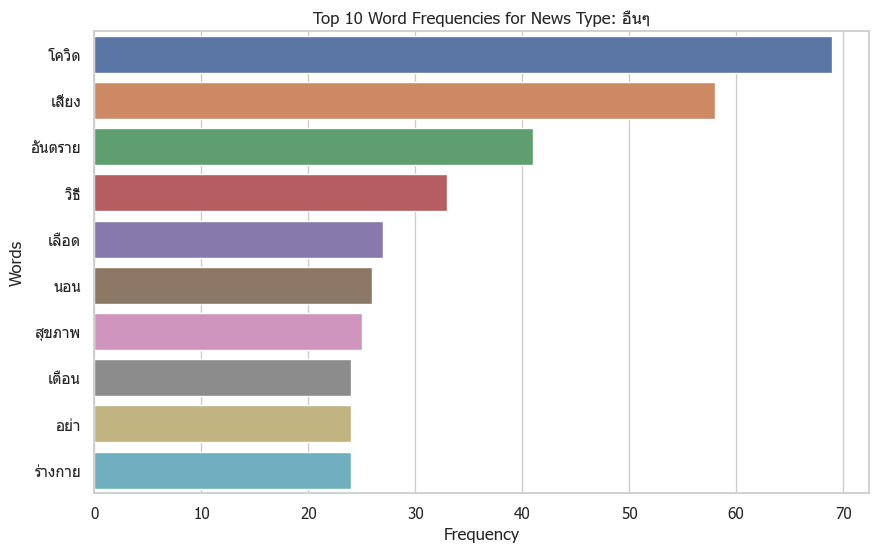

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


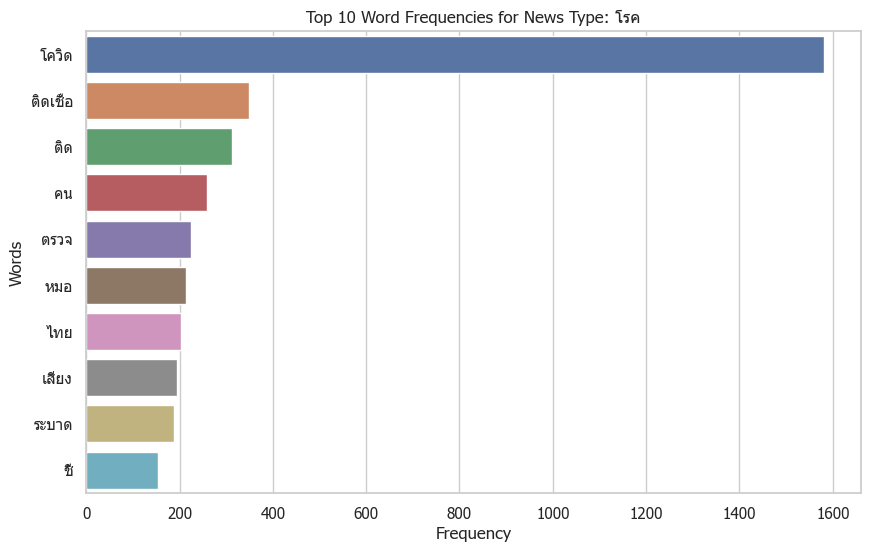

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


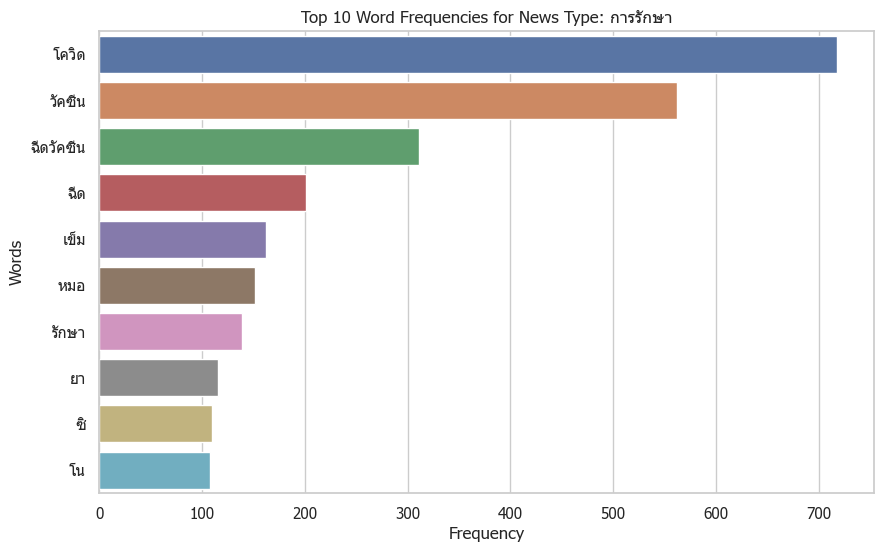

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


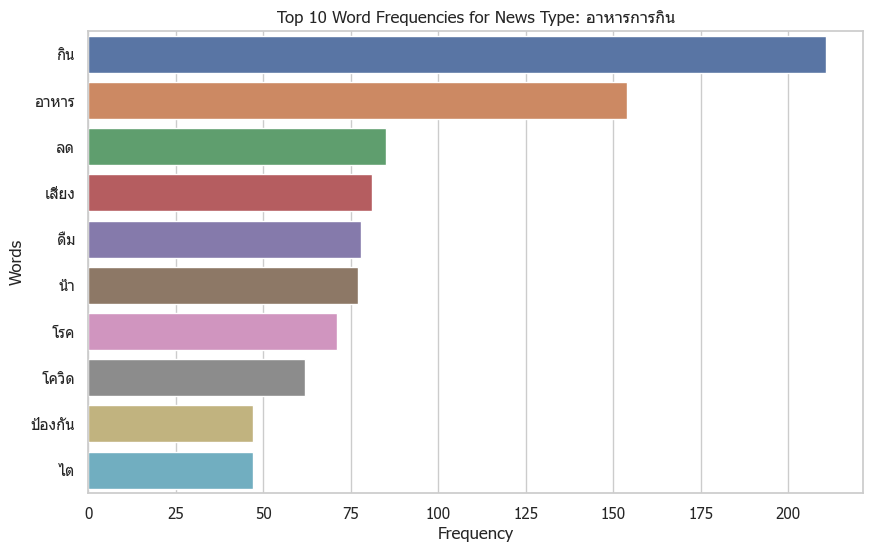

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


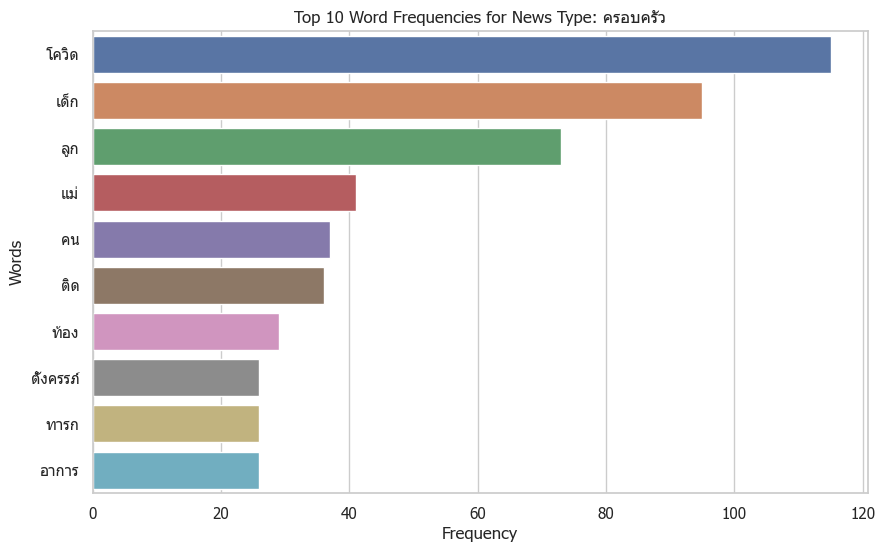

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


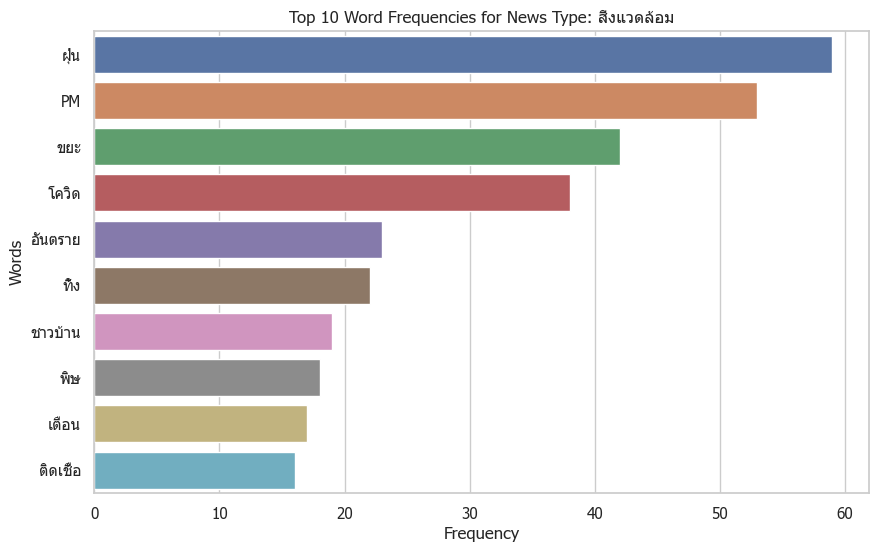

C:\Users\Chonn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


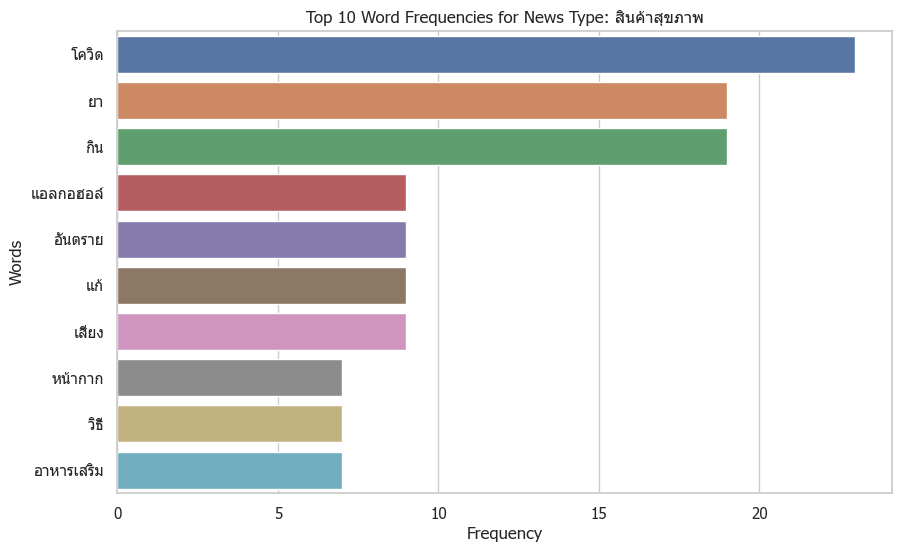

In [35]:
def get_top_word_frequencies_by_type(dataframe, text_column, type_column, top_n=10):
    top_word_frequencies = {}

    # Iterate over unique news types
    for newstype in dataframe[type_column].unique():
        # Filter data for the specific news type
        subset = dataframe[dataframe[type_column] == newstype]

        # Concatenate titles for the specific news type
        text = ' '.join(subset[text_column])

        # Split the text into words
        words = text.split()

        # Count word frequencies using Counter
        word_frequency_counter = Counter(words)

        # Get the top N words for the news type
        top_words = dict(word_frequency_counter.most_common(top_n))

        # Store the top word frequencies for the news type
        top_word_frequencies[newstype] = top_words

    return top_word_frequencies


# Get top 10 word frequencies for each news type
top_word_frequencies_by_type = get_top_word_frequencies_by_type(df, 'title', 'newstype', top_n=10)

# Create a horizontal bar plot for each news type
for newstype, top_word_frequencies in top_word_frequencies_by_type.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_word_frequencies.values()), y=list(top_word_frequencies.keys()), orient='h')
    plt.title(f"Top 10 Word Frequencies for News Type: {newstype}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

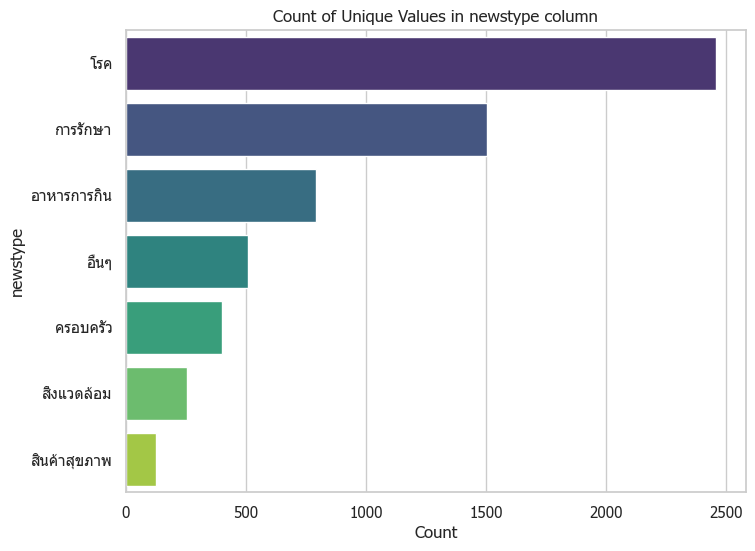

In [36]:
# Count unique values in the 'newstype' column
value_counts = df['newstype'].value_counts()

# Plot the horizontal bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
plt.title('Count of Unique Values in newstype column')
plt.xlabel('Count')
plt.ylabel('newstype')

# Show the plot
plt.show()

In [37]:
# export data to csv file
df.to_csv('../../../../OneDrive/Documents/data.csv', index=False)